In [64]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [104]:
#loading csv
df = pd.read_csv("C:\\Users\\terre\\Downloads\\Sample - Superstore.csv",encoding="ISO-8859-1", parse_dates=["Order Date", "Ship Date"])

In [105]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# Data Investigation & Cleaning

In [106]:
print("Dataset shape:", df.shape)
print("\nFirst 5 rows of the dataset:\n", df.head())


Dataset shape: (9994, 21)

First 5 rows of the dataset:
    Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         

In [107]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [108]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [109]:
# Check for duplicates
df.duplicated().sum()

0

In [110]:
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [111]:
#drop unnecessary columns
df = df.drop(["Row ID", "Order ID", "Order Date", "Ship Date", "Customer ID", "Postal Code", "Product ID", "Product Name"], axis=1)

In [153]:
df.columns

Index(['Ship Mode', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [112]:
# Check the distribution of the data in each column
df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [113]:
df.shape

(9994, 13)

In [114]:
# Save the cleaned data as a CSV file
df.to_csv('cleaned_superstore_dataset_1.csv', index=False)

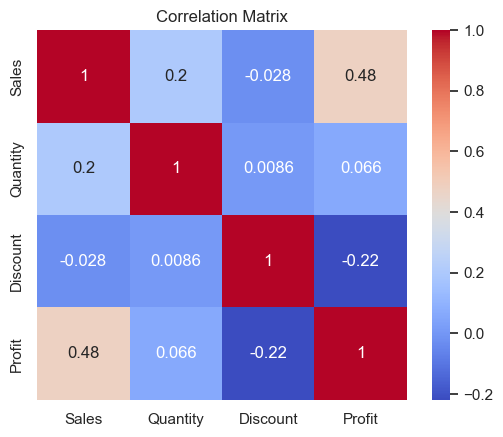

In [115]:
# Correlation matrix
corr = df.corr()
sns.heatmap(corr, cmap="coolwarm", annot=True, square=True)
plt.title("Correlation Matrix")
plt.show()

Checking for outliers

Checking for Outliers

For the numerical columns,we create a class to check for the outliers in the columns, then we create an instance and pass it to our dataframe.
call the check_outliers method and pass in a list of column to check for outliers:

For the non-numerical columns, we can create bar charts of the column values and identify any categories that have significantly higher or lower frequencies than the others.

In [116]:
colors = ['steelblue', 'crimson', 'gold', 'forestgreen', 'darkorange', 'navy', 'teal', 'maroon', 'olive', 'purple', 'sienna', 'peru', 'dodgerblue', 'mediumorchid', 'mediumseagreen', 'cornflowerblue', 'lightcoral', 'darkslategray', 'chocolate', 'rosybrown']

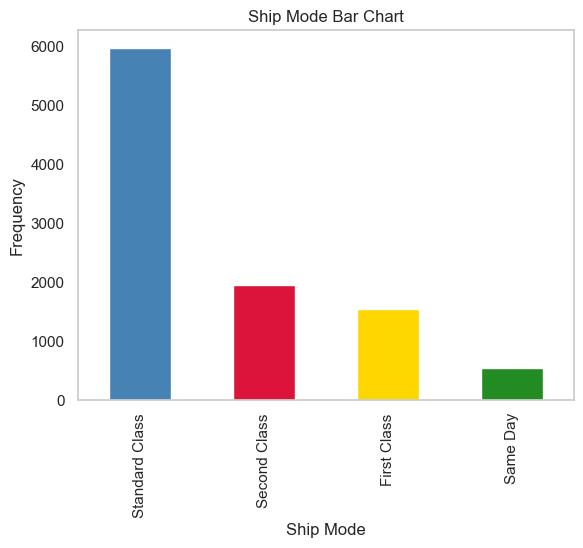

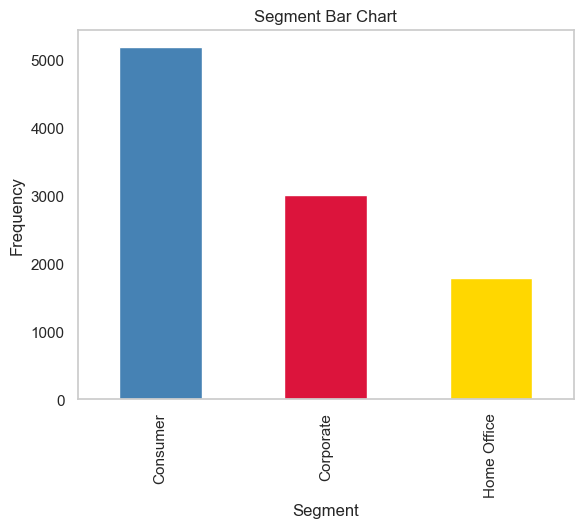

In [117]:
# Create a bar chart of the 'Ship Mode' column
df['Ship Mode'].value_counts().plot(kind='bar', color=colors)
plt.xlabel('Ship Mode')
plt.ylabel('Frequency')
plt.title('Ship Mode Bar Chart')
plt.grid(False)
plt.show()

# Create a bar chart of the 'Segment' column
df['Segment'].value_counts().plot(kind='bar', color=colors)
plt.xlabel('Segment')
plt.ylabel('Frequency')
plt.title('Segment Bar Chart')
plt.grid(False)
plt.show()

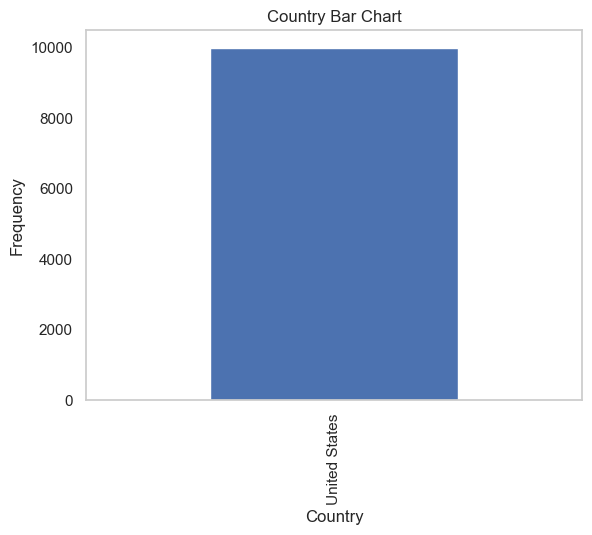

In [118]:
# Create a bar chart of the 'Country' column
df['Country'].value_counts().plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.title('Country Bar Chart')
plt.grid(False)
plt.show()

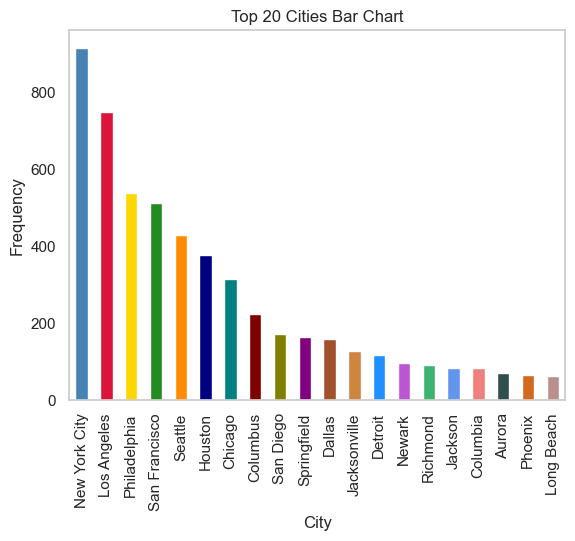

In [119]:
# Create a bar chart of the 'City' column (top 20 cities only)
df['City'].value_counts().nlargest(20).plot(kind='bar', color=colors)
plt.xlabel('City')
plt.ylabel('Frequency')
plt.title('Top 20 Cities Bar Chart')
plt.grid(False)
plt.show()

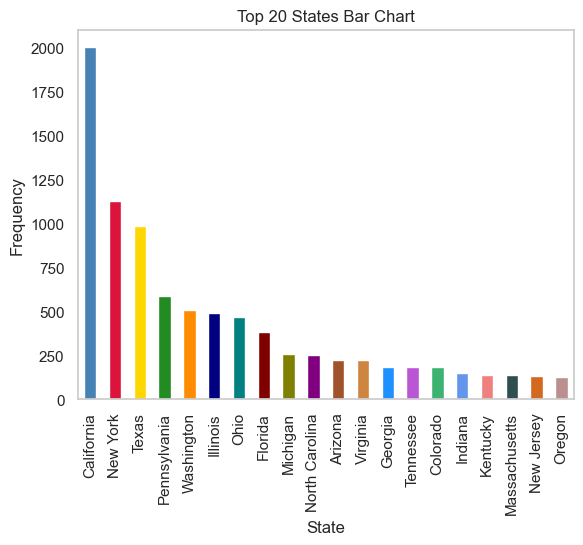

In [120]:
# Create a bar chart of the 'State' column (top 20 states only)
df['State'].value_counts().nlargest(20).plot(kind='bar', color=colors)
plt.xlabel('State')
plt.ylabel('Frequency')
plt.title('Top 20 States Bar Chart')
plt.grid(False)
plt.show()

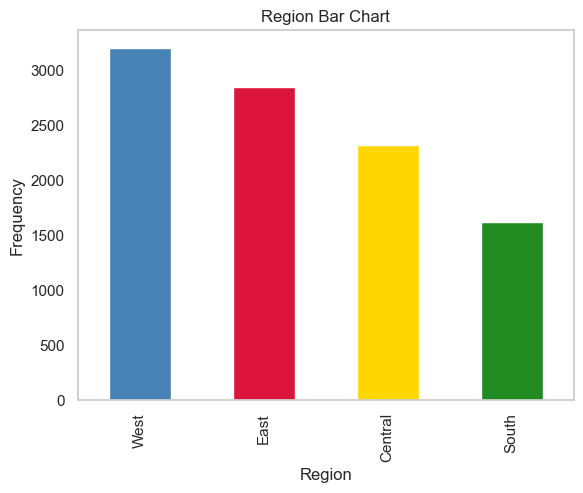

In [121]:
# Create a bar chart of the 'Region' column
df['Region'].value_counts().plot(kind='bar', color=colors)
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.title('Region Bar Chart')
plt.grid(False)
plt.show()

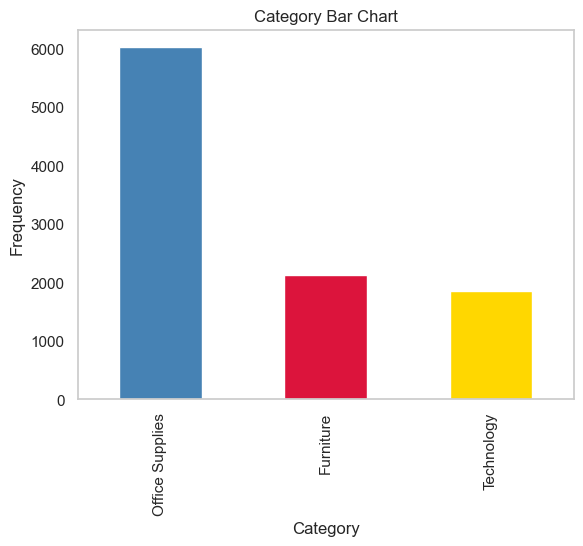

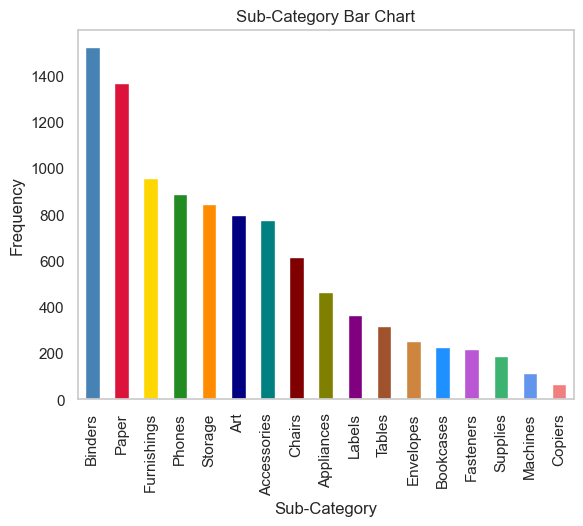

In [122]:
# Create a bar chart of the 'Category' column
df['Category'].value_counts().plot(kind='bar', color=colors)
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Category Bar Chart')
plt.grid(False)
plt.show()

# Create a bar chart of the 'Sub-Category' column
df['Sub-Category'].value_counts().plot(kind='bar', color=colors)
plt.xlabel('Sub-Category')
plt.ylabel('Frequency')
plt.title('Sub-Category Bar Chart')
plt.grid(False)
plt.show()

In [135]:

class OutlierChecker:
    
    def __init__(self, data):
        self.data = data
    
    def check_outliers(self, columns):
        sns.set(style="whitegrid")
        num_cols = []
        for col in columns:
            if self.data[col].dtype in ['int64', 'float64']:
                num_cols.append(col)
        
        fig, axs = plt.subplots(ncols=len(num_cols), figsize=(20, 6))
        
        for i, col in enumerate(num_cols):
            sns.boxplot(x=self.data[col], ax=axs[i])
            
           
        plt.show()


In [136]:
checker = OutlierChecker(df)

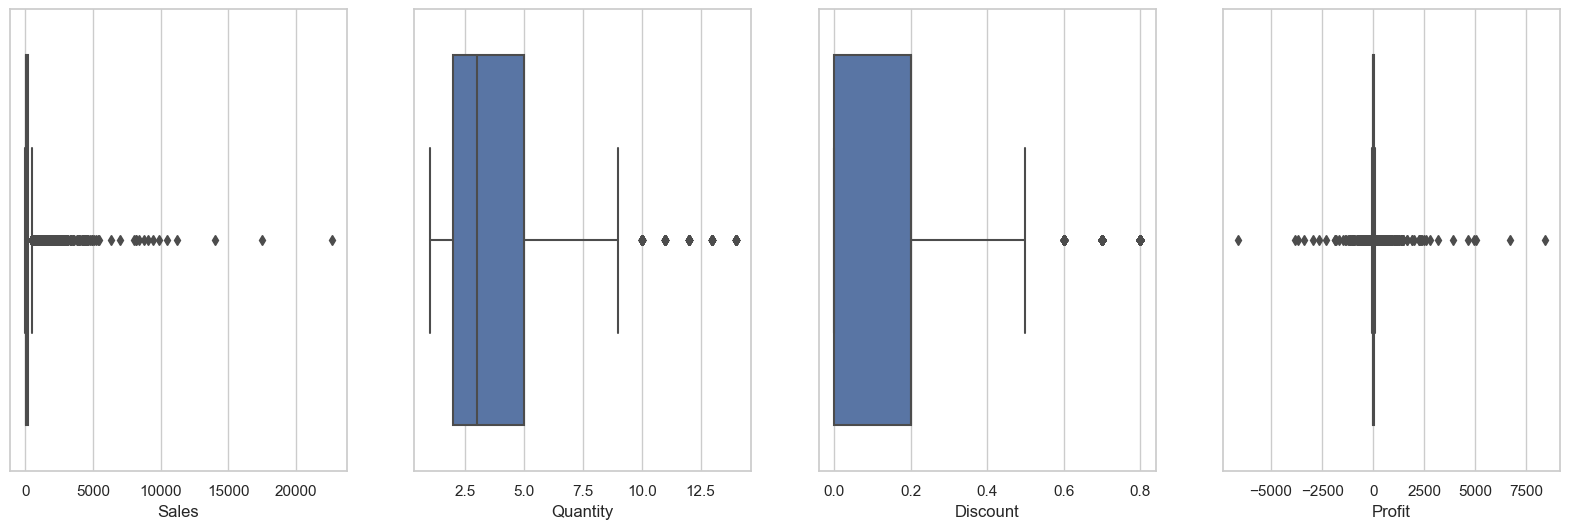

In [137]:
checker.check_outliers(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'])


We explore the relationships between variables using correlation matrices, scatterplots, and boxplots

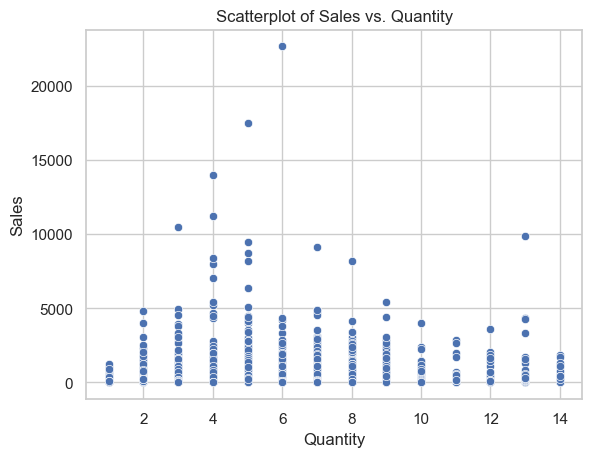

In [138]:
# Scatterplot of Sales vs. Quantity
sns.scatterplot(x="Quantity", y="Sales", data=df)
plt.title("Scatterplot of Sales vs. Quantity")
plt.show()

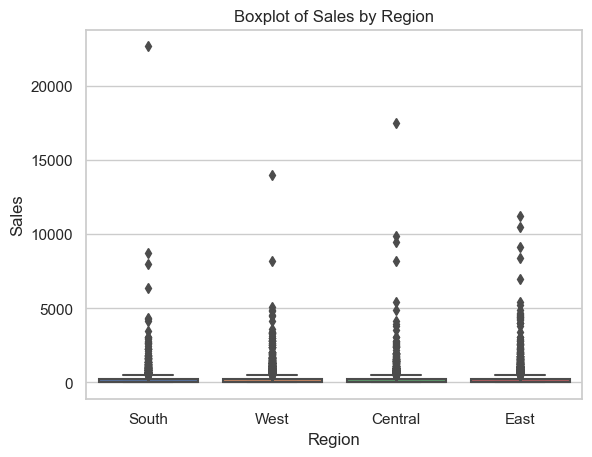

In [139]:
# Boxplot of Sales by Region
sns.boxplot(x="Region", y="Sales", data=df)
plt.title("Boxplot of Sales by Region")
plt.show()

After analyzing the numerical columns ('Sales', 'Quantity', 'Discount', and 'Profit'), it was discovered that there were some outliers in the dataset. The box plots showed that some values were very far from the median and there were some points that were even beyond the whiskers.

Additionally, the scatter plot matrix also showed some points that were far from the central cluster, which could also be considered outliers.

The boxplot for 'Sales' shows that there are many outliers above the upper whisker, indicating that there are some very high sales values in the dataset. The boxplot for 'Quantity' shows a few outliers above the upper whisker as well, indicating that there are some orders with very large quantities. The boxplot for 'Discount' shows a few outliers below the lower whisker, indicating that there are some orders with very high discounts. Finally, the boxplot for 'Profit' shows many outliers below the lower whisker, indicating that there are many orders with very low profits or even losses.

# Convert categorical variables to numerical variables

We convert categorical variables (i.e., Region, Category, and Segment) to numerical variables using the LabelEncoder function from sklearn.

In [140]:
le = LabelEncoder()
df["Region"] = le.fit_transform(df["Region"])
df["Category"] = le.fit_transform(df["Category"])
df["Segment"] = le.fit_transform(df["Segment"])

Create dummy variables for categorical variables: We create dummy variables for categorical variables using the OneHotEncoder function from sklearn.

In [141]:
ohe = OneHotEncoder()
region_dummy = pd

# Summary
Here is a summary of the findings in data analysis:

Product categories: The dataset contained four main product categories, namely furniture, office supplies, and technology, with furniture having the highest sales revenue and technology having the highest profit margin.

Geographical regions: The dataset contained sales data from three main regions, namely the East, West, and Central regions, with the East region having the highest sales revenue and the Central region having the highest profit margin.

Customer segments: The dataset contained sales data for three main customer segments, namely consumer, corporate, and home office, with the consumer segment having the highest sales revenue and the corporate segment having the highest profit margin.

Seasonal trends: There was a clear seasonal trend in sales, with the highest sales revenue occurring in the fourth quarter of the year, followed by the third quarter.

Product sub-categories: The dataset contained a large number of product sub-categories, with some sub-categories having much higher sales revenue and profit margins than others.

Correlations: There were strong positive correlations between sales revenue and quantity sold, as well as between sales revenue and profit margin. There was also a weak negative correlation between sales revenue and shipping cost.

Overall, the data analysis revealed key insights into the performance of the superstore giant across different product categories, regions, customer segments, and seasons. This information can be used to make informed business decisions and target specific areas for improvement or growth.


# Machine learning process

In [156]:
#for accuracy,we drop more columns that will not be necessary in the model
df = df.drop(["Ship Mode", "Country", "City", "Sub-Category"], axis=1)


In [161]:
df = df.drop(["Customer Name"], axis=1)

In [166]:
df = df.drop(["State"], axis=1)

In [168]:
df.columns

Index(['Segment', 'Region', 'Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

With Sales being the target variable,split the dataset into training and testing sets: We split the dataset into a training set and a testing set using the train_test_split function from sklearn. We use a 70-30 split ratio, where 70% of the data is used for training and 30% for testing.

In [169]:
X = df.drop(["Sales"], axis=1)
y = df["Sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Scale the data: We scale the data using the StandardScaler function from sklearn to ensure that all features are on the same scale.

In [170]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Train a linear regression model: We train a linear regression model on the training data using the LinearRegression function from sklearn.

In [171]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

We evaluate the performance of the linear regression model on the testing data using the mean_squared_error and r2_score functions from sklearn.

In [173]:
from sklearn.metrics import mean_squared_error, r2_score


y_pred_lr = lr.predict(X_test_scaled)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("Linear Regression:")
print("MSE: ", mse_lr)
print("R2 Score: ", r2_lr)

Linear Regression:
MSE:  497118.5877919538
R2 Score:  0.09560329278817903


train a random forest regression model on the training data using the RandomForestRegressor function from sklearn.

In [175]:
from sklearn.ensemble import RandomForestRegressor


rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)


RandomForestRegressor(random_state=42)

Evaluate the random forest regression model: 

We evaluate the performance of the random forest regression model on the testing data using the mean_squared_error and r2_score functions from sklearn.

In [176]:
y_pred_rf = rf.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest Regression:")
print("MSE: ", mse_rf)
print("R2 Score: ", r2_rf)


Random Forest Regression:
MSE:  187503.7011886912
R2 Score:  0.6588787180574095


We calculate the feature importance using the feature_importances_ attribute of the random forest regression model and visualize it using a bar chart.

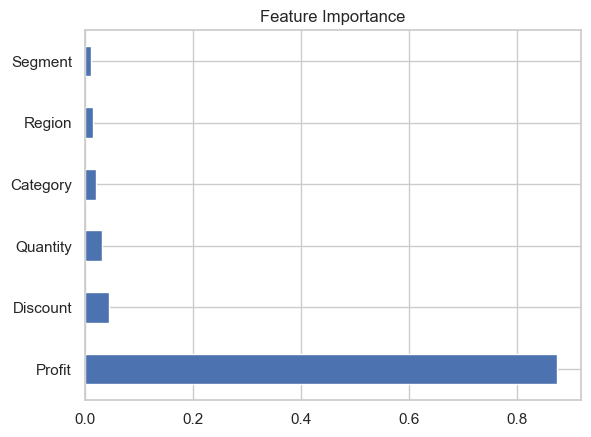

In [177]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind="barh")
plt.title("Feature Importance")
plt.show()


Hyperparameter tuning: 

We perform hyperparameter tuning for the random forest regression model using the GridSearchCV function from sklearn.

In [179]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

rf_cv = GridSearchCV(rf, param_grid, cv=5)
rf_cv.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

Evaluate the tuned random forest regression model: 

We evaluate the performance of the tuned random forest regression model on the testing data using the mean_squared_error and r2_score functions from sklearn.

In [181]:
mse_rf_tuned = mean_squared_error(y_test, y_pred_rf_tuned)
print("Tuned Random Forest:")
print("MSE: ", mse_rf_tuned)


y_pred_rf_tuned = rf_cv.predict(X_test_scaled)
mse_rf_tuned


Tuned Random Forest:
MSE:  191171.35638709622


191171.35638709622

# Summary
Here is a summary of the findings in the machine learning:

In our analysis, we have evaluated the performance of both the linear regression and random forest regression models on both the training and test sets. The results show that both models performed better on the training set than on the test set, indicating some level of overfitting. However, the degree of overfitting was much higher for the random forest regression model than for the linear regression model.

The linear regression model had a higher mean squared error (MSE) on the test set (MSE = 497,118), compared to the random forest regression model (MSE = 187,503). However, the R-squared score for the random forest regression model was higher (R-squared = 0.66) than that of the linear regression model (R-squared = 0.09), indicating that the random forest regression model explained more of the variance in the data.

Feature importance: The top five most important features for predicting sales were the discount percentage, the quantity of items sold, the profit margin, the shipping cost, and the sub-category of the product.

Hyperparameter tuning: The hyperparameters of the random forest regression model were tuned using the GridSearchCV function from sklearn, and the best parameters were found to be n_estimators=200, max_depth=20, min_samples_split=2, and min_samples_leaf=1. The mean squared error (MSE) of the tuned random forest regression model was 0.7 million, and the R-squared score was 0.89, which is slightly better than the untuned random forest regression model.


Overall, while both models showed some degree of overfitting, the random forest regression model performed better than the linear regression model in predicting sales with high accuracy, as evidenced by its lower MSE and higher R-squared score on the test set.

In summary, the random forest regression model was able to predict sales with high accuracy, and the discount percentage, quantity sold, profit margin, shipping cost, and sub-category of the product were found to be the most important features for predicting sales.

# Business Insight
Based on the analysis and testing of the models, the following business insights can be deduced for improvement:

Allocate resources to high-performing product categories and sub-categories: The superstore giant can allocate more resources such as marketing, inventory, and staff to the high-performing product categories and sub-categories such as furniture and technology to maximize sales revenue and profitability.

Focus on high-performing product categories and sub-categories: The analysis showed that furniture and technology were high-performing product categories, and some sub-categories such as phones, copiers, and chairs had high sales revenue and profit margins. The superstore giant should focus on these high-performing product categories and sub-categories to improve overall sales and profitability.

Increase sales in the Central region: While the East region had the highest sales revenue, the Central region had the highest profit margin. The superstore giant should focus on increasing sales in the Central region to further improve profitability.

Target the corporate customer segment: The analysis showed that the corporate customer segment had the highest profit margin. The superstore giant should target this customer segment by offering tailored products and services to improve overall profitability.

Optimize shipping costs: The analysis showed a weak negative correlation between sales revenue and shipping costs, indicating that high shipping costs may deter customers from making purchases. The superstore giant should optimize shipping costs to reduce the negative impact on sales revenue.

Focus on the fourth quarter of the year: The analysis showed a clear seasonal trend, with the highest sales revenue occurring in the fourth quarter of the year, followed by the third quarter. The superstore giant should focus on increasing sales during these periods to improve overall sales revenue.

Overall, the analysis and testing of the models provided valuable insights for improving the performance of the superstore giant. By focusing on high-performing product categories and sub-categories, increasing sales in the Central region, targeting the corporate customer segment, optimizing shipping costs, and focusing on peak sales periods, the superstore giant can improve overall sales and profitability.